# Лабораторная работа 1. Геометрические преобазования изображений
## Выполнила студентка группы 1304 Чернякова Валерия Алексеевна
### Задача
Реализовать на языке Python  с использованием библиотеки OpenCV программу, выполняющее геометрические преобразования изображения

In [1]:
#  Основные импорты
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

#### Инициализация основных переменных

In [2]:
img_in = 'input.jpg'
alpha = 150
k = 0.5
# Признак используемой интерполяционной схемы
# 0 – нулевого порядка
# 1 – первого порядка
# 2- третьего порядка
inter_value = 1
img_out = 'output.bmp'

#### Открытие изображения

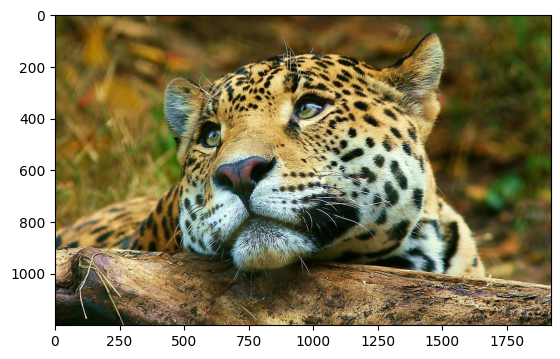

In [3]:
img = cv2.imread(img_in)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#### Поворот изображение на угол $\alpha$ против часовой стрелки

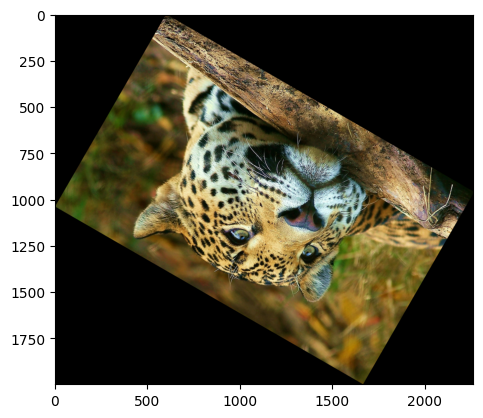

In [4]:
h, w = img.shape[:2]
center = (w / 2, h / 2)

# Матрица поворота с углом alpha
M_rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)

abs_cos = abs(M_rotation[0,0])
abs_sin = abs(M_rotation[0,1])

# Размер изображения после поворота
rotated_w = int(h * abs_sin + w * abs_cos)
rotated_h = int(h * abs_cos + w * abs_sin)

# Корректировка центра изображения
M_rotation[0, 2] += rotated_w/2 - center[0]
M_rotation[1, 2] += rotated_h/2 - center[1]

# Применение матрицы поворота к изображению
rotated_img = cv2.warpAffine(img, M_rotation, (rotated_w, rotated_h))

plt.imshow(rotated_img)
plt.show()

#### Прямоугольник максимальной площади, вписаный в повернутое изображение

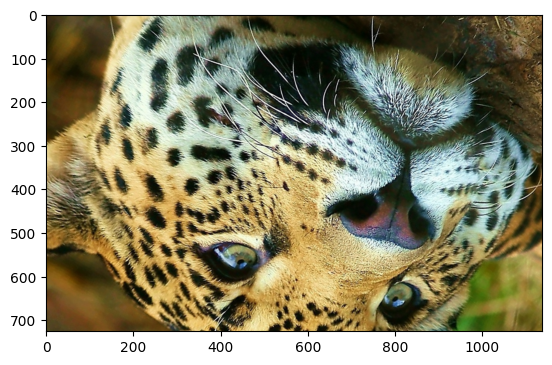

In [5]:
# Нормализация угла alpha
quadrant = (alpha % 360) // 90
sign_alpha = math.radians(alpha) if quadrant % 2 == 0 else math.radians(180 - alpha)
normal_alpha = sign_alpha % math.pi

# Вычисление новых размеров повернутого изображения
rotated = {
   "w" : w * np.cos(normal_alpha) + h * np.sin(normal_alpha),
   "h" : h * np.cos(normal_alpha) + w * np.sin(normal_alpha)
}

# Вычисление угла beta как ориентации главной диагонали
beta = np.arctan2(rotated['h'], rotated['w']) if rotated['w'] >= rotated['h'] else np.arctan2(rotated['w'], rotated['h']) 

# Вычисление угла gamma, который помогает определить область наибольшей площади
gamma = np.pi / 2 - normal_alpha + beta

# Определение вспомогательных отрезков a и b для корректировки размеров
length = max(h, w)
a = length * np.cos(normal_alpha)
b = a * np.sin(normal_alpha)/np.sin(gamma)

# Вычисление размеров итогового обрезанного прямоугольника
rect_w = int(rotated['w'] - 2 * b * np.sin(beta))
rect_h = int(rotated['h'] - 2 * b * np.cos(beta))

# Ограничение размеров обрезанного изображения, чтобы не выйти за границы
rect_w = min(rect_w, rotated_w)
rect_h = min(rect_h, rotated_h)

# Определение координат области, которую нужно вырезать из повернутого изображения
x1 = int(rotated_w // 2 - rect_w // 2)
x2 = int(rotated_w // 2 + rect_w // 2)
y1 = int(rotated_h // 2 - rect_h // 2)
y2 = int(rotated_h // 2 + rect_h // 2)

rect_img = rotated_img[y1:y2, x1:x2]
plt.imshow(rect_img)
plt.show()

#### Увеличение по оси $Y$ в $\frac{1}{k}$ раз и уменьшение по оси $Х$ в $k$ раз

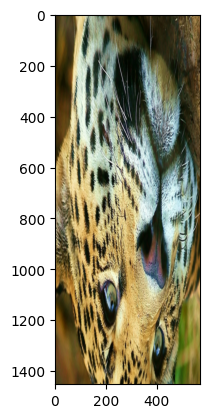

True

In [6]:
inter_scheme = {0: cv2.INTER_NEAREST, 1: cv2.INTER_LINEAR, 2: cv2.INTER_CUBIC}
h, w = rect_img.shape[:2]
# Изменение размеров изображения
res = cv2.resize(rect_img, (int(w * k), int(h / k)), inter_scheme[inter_value])

plt.imshow(res)
plt.show()

# Сохранение результата с использованием интерполяции
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
cv2.imwrite(img_out, res)